## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%reload_ext nb_black

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how= "right")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


<IPython.core.display.Javascript object>

In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

<IPython.core.display.Javascript object>

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = df[["Mouse ID", "Timepoint"]]
duplicates = duplicate_mice_df[duplicate_mice_df.duplicated(keep="first")]
duplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


<IPython.core.display.Javascript object>

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[(df["Mouse ID"] == "k403")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


<IPython.core.display.Javascript object>

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df.drop(df.index[df["Mouse ID"] == "k403"].tolist())
df.loc[(df["Mouse ID"] == "k403")]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


<IPython.core.display.Javascript object>

In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

<IPython.core.display.Javascript object>

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ["mean",
        "median",
        "var",
        "std",
        "sem"]})
# This method is the most straighforward, creating multiple series and putting them all together at the end.



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.577199  41.020724  19.660760  4.434046  0.300311
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<IPython.core.display.Javascript object>

## Bar and Pie Charts

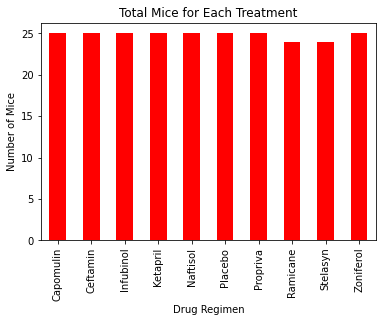

<IPython.core.display.Javascript object>

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = df.groupby(["Drug Regimen"])["Mouse ID"].nunique()

mice_bar_plot = total_mice.plot(kind="bar", title="Total Mice for Each Treatment", color="r")
mice_bar_plot.set_ylabel("Number of Mice")
plt.show()

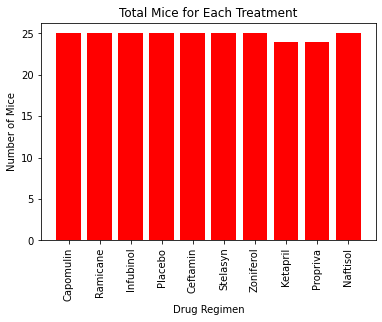

<IPython.core.display.Javascript object>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug = df["Drug Regimen"].unique()
drug

#create bar chart
plt.title("Total Mice for Each Treatment")
plt.bar(drug, total_mice, color="r",)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.show()


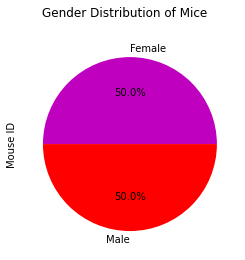

<IPython.core.display.Javascript object>

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_by_sex = df.groupby(["Sex"])["Mouse ID"].nunique().to_frame()

mice_by_sex.plot(kind="pie", subplots="True", title="Gender Distribution of Mice", autopct="%1.1f%%", colors=["m", "r"], legend=False)
plt.show()

In [11]:
#Easy way to get dataset for piechart
mice_by_sex

,Mouse ID
Sex,
Female,124
Male,124


<IPython.core.display.Javascript object>

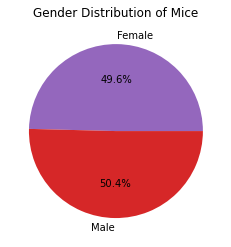

<IPython.core.display.Javascript object>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = [123, 125]
labels = ["Female", "Male"]
colors = ["tab:purple", "tab:red"]

#create pie chart
plt.title("Gender Distribution of Mice")
plt.pie(sex, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = df.groupby(["Mouse ID"])["Timepoint"].max().to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(df,last_timepoint_df,how="inner",on=["Mouse ID", "Timepoint"])
final_tumor_vol_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,g791,Ramicane,Male,11,16,45,29.128472,1
4,s508,Ramicane,Male,1,17,45,30.276232,0
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


<IPython.core.display.Javascript object>

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

<IPython.core.display.Javascript object>

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


<IPython.core.display.Javascript object>

## Line and Scatter Plots

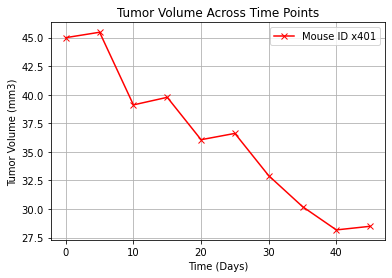

<IPython.core.display.Javascript object>

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = df[df["Mouse ID"]== "x401"]

x401_timepoints = capomulin_mouse["Timepoint"]
x401_tumor_vol = capomulin_mouse["Tumor Volume (mm3)"]

plt.title("Tumor Volume Across Time Points")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.plot(x401_timepoints, x401_tumor_vol, color="r", label="Mouse ID x401", marker="x")
plt.legend()
plt.grid()
plt.show()

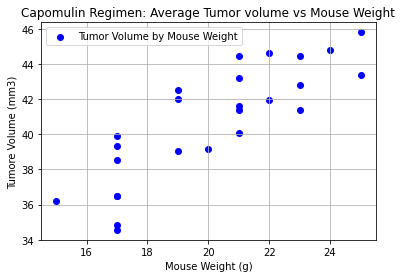

<IPython.core.display.Javascript object>

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capommulin_data_df = df[df["Drug Regimen"] == "Capomulin"]

mouse_weight = capommulin_data_df.groupby(["Mouse ID"])["Weight (g)"].mean()
avg_tumor_vol = capommulin_data_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.title("Capomulin Regimen: Average Tumor volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumore Volume (mm3)")
plt.scatter(mouse_weight, avg_tumor_vol, color="b", label="Tumor Volume by Mouse Weight")
plt.grid()
plt.legend()
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


<IPython.core.display.Javascript object>